In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as plt

In [3]:
df = pd.read_csv("./Stromerzeuger_east_data.csv", delimiter = ';')

In [4]:
df

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,...,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5",NaN,NaN,NaN,NaN,NaN
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4",NaN,NaN,NaN,NaN,NaN
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06",NaN,NaN,NaN,NaN,NaN
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,...,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5",NaN,NaN,NaN,NaN,NaN
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,SEE997194319011,PVA Sergen West II,In Planung,Solare Strahlungsenergie,"31349,03",29455,NaN,11/17/2022,Brandenburg,3058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2877,SEE963703390772,GR-HvG3B-600W-G,In Planung,Solare Strahlungsenergie,"0,8","0,6",NaN,11/21/2022,Sachsen,2827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,"3079,56",2540,11/23/2022,11/23/2022,Sachsen,2633,...,SEL912593382787,EEG908020485459,NaN,11/23/2022,"3079,56","SOL21-1/240,",NaN,NaN,NaN,NaN
2879,SEE993523763937,Garten /Pool,In Planung,Solare Strahlungsenergie,"0,79","0,6",NaN,11/24/2022,Sachsen,1619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['Betriebs-Status'].unique() #'In operation', 'In planning', 'Finally decommissioned','Temporarily suspended'

array(['In Betrieb', 'In Planung', 'Endgültig stillgelegt',
       'Vorübergehend stillgelegt'], dtype=object)

In [6]:
df.dropna(axis=1, how='all', inplace = True) #removing columns where everything is NA

In [7]:
df= df[df['Betriebs-Status']=='In Betrieb'] #selecting only operational PV

In [8]:
df.isnull().sum()

MaStR-Nr. der Einheit                        0
Anzeige-Name der Einheit                     0
Betriebs-Status                              0
Energieträger                                0
Bruttoleistung der Einheit                   0
Nettonennleistung der Einheit                0
Inbetriebnahmedatum der Einheit              0
Registrierungsdatum der Einheit              0
Bundesland                                   0
Postleitzahl                                 0
Ort                                          0
Straße                                    1156
Hausnummer                                1427
Gemarkung                                 2129
Flurstück                                 2116
Gemeindeschlüssel                            0
Koordinate: Breitengrad (WGS84)            465
Koordinate: Längengrad (WGS84)             465
Anzahl der Solar-Module                     23
Hauptausrichtung der Solar-Module           36
Lage der Einheit                             0
Letzte Aktual

In [9]:
#dropping complete NA columns
df.drop(labels = ['Datum der endgültigen Stilllegung','Datum der geplanten Inbetriebnahme'], axis =1 )

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung)
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5",NaN
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4",NaN
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06",NaN
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5",NaN
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,"0,3","0,3",11/13/2022,11/13/2022,Sachsen,2708,...,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,"0,3",NaN
2874,SEE944979911410,Balkonkraftwerk,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",11/14/2022,11/14/2022,Sachsen,4827,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL973794615104,EEG996692832244,NaN,11/14/2022,"0,6",NaN
2875,SEE952055081995,PV Anlage Garten,In Betrieb,Solare Strahlungsenergie,"3,465","3,465",11/15/2022,11/17/2022,Brandenburg,3099,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL969007424878,EEG901635864688,E41081010000000000000000000453919,11/15/2022,"3,465",NaN
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,"3079,56",2540,11/23/2022,11/23/2022,Sachsen,2633,...,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Umspannebene Hochspannung/Mittelspannung,SEL912593382787,EEG908020485459,NaN,11/23/2022,"3079,56","SOL21-1/240,"


In [10]:
#dropping columns with >2000 NA vals
df.drop(labels = ["Gemarkung","Flurstück","MaStR-Nr. der Genehmigung" , "Zuschlagnummer (EEG/KWK-Ausschreibung)"], axis =1 )

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,Volleinspeisung oder Teileinspeisung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5"
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4"
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,Volleinspeisung,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06"
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5"
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,"0,3","0,3",11/13/2022,11/13/2022,Sachsen,2708,...,Teileinspeisung (einschließlich Eigenverbrauch),SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,"0,3"
2874,SEE944979911410,Balkonkraftwerk,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",11/14/2022,11/14/2022,Sachsen,4827,...,Teileinspeisung (einschließlich Eigenverbrauch),Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL973794615104,EEG996692832244,NaN,11/14/2022,"0,6"
2875,SEE952055081995,PV Anlage Garten,In Betrieb,Solare Strahlungsenergie,"3,465","3,465",11/15/2022,11/17/2022,Brandenburg,3099,...,Teileinspeisung (einschließlich Eigenverbrauch),Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL969007424878,EEG901635864688,E41081010000000000000000000453919,11/15/2022,"3,465"
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,"3079,56",2540,11/23/2022,11/23/2022,Sachsen,2633,...,Volleinspeisung,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Umspannebene Hochspannung/Mittelspannung,SEL912593382787,EEG908020485459,NaN,11/23/2022,"3079,56"


In [11]:
df['Koordinate: Breitengrad (WGS84)']

0          50,986
1       51,486613
2          51,852
3          50,986
4       51,068775
          ...    
2873          NaN
2874          NaN
2875          NaN
2878    51,149438
2880          NaN
Name: Koordinate: Breitengrad (WGS84), Length: 2820, dtype: object

In [12]:
df.replace(',','', regex=True, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
df['Koordinate: Breitengrad (WGS84)']

0          50986
1       51486613
2          51852
3          50986
4       51068775
          ...   
2873         NaN
2874         NaN
2875         NaN
2878    51149438
2880         NaN
Name: Koordinate: Breitengrad (WGS84), Length: 2820, dtype: object

In [14]:
gdf_pv = gpd. GeoDataFrame (df ,geometry=gpd. points_from_xy (df['Koordinate: Längengrad (WGS84)'], df['Koordinate: Breitengrad (WGS84)']), crs="EPSG:4326")

In [15]:
gdf_pv.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
gdf_pv.plot()

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 432x288 with 1 Axes>

In [17]:
""" 
Alternative dataset
1. level-0 | Country
 2. level-1 | State
 3. level-2 | District
 4. level-3 | Municipality
 5. level-4 | Town
 https://gadm.org/download_country_v3.html
 """

' \nAlternative dataset\n1. level-0 | Country\n 2. level-1 | State\n 3. level-2 | District\n 4. level-3 | Municipality\n 5. level-4 | Town\n https://gadm.org/download_country_v3.html\n '

In [18]:
""" 
#used in this notebook 
1. level-0 | Country
 2. level-1 | State
 3. level-2 | Admistrative regions
 4. level-3 | districts
 https://data.biogeo.ucdavis.edu/data/diva/adm/DEU_adm.zip"""

' \n#used in this notebook \n1. level-0 | Country\n 2. level-1 | State\n 3. level-2 | Admistrative regions\n 4. level-3 | districts\n https://data.biogeo.ucdavis.edu/data/diva/adm/DEU_adm.zip'

In [19]:
germany = gpd.read_file("./DEU_adm/DEU_adm1.shp")

In [20]:
germany.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

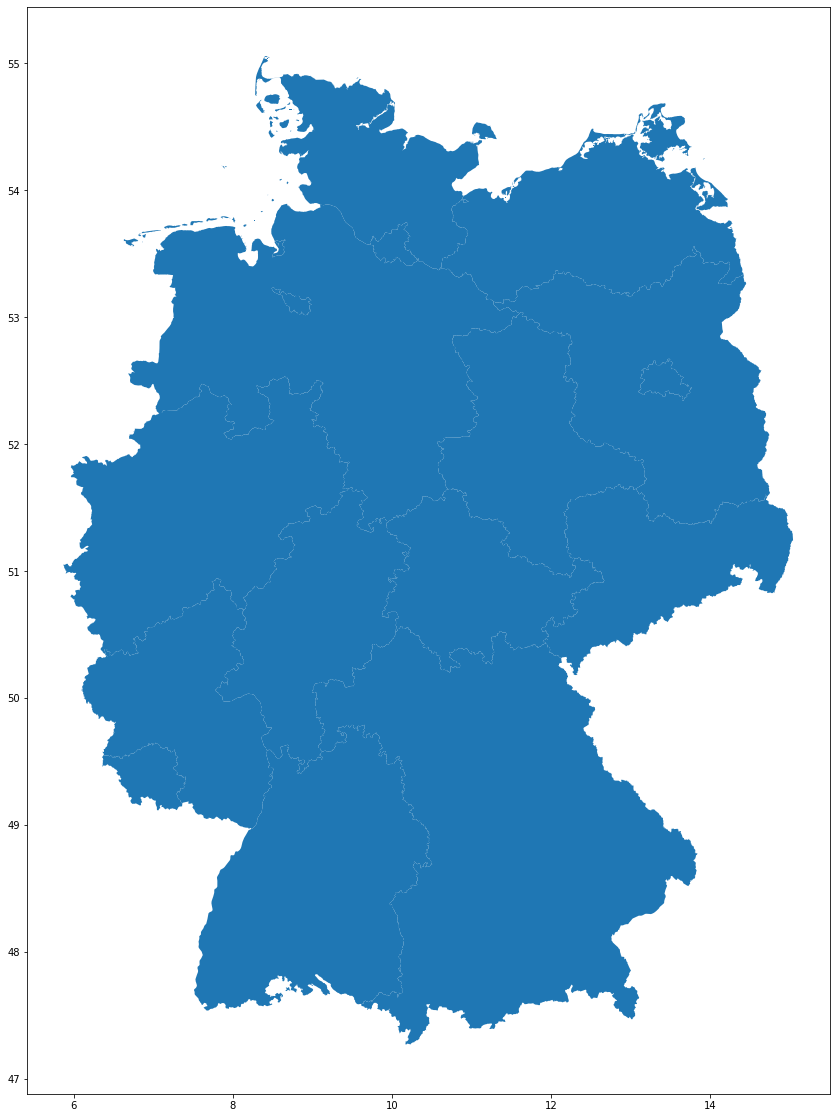

In [21]:
germany.plot(figsize = (20,20))

In [22]:
east_germany = ['Berlin','Brandenburg','Sachsen','Sachsen-Anhalt']

In [23]:
east_ger = germany.loc[germany_districts['NAME_1'].isin(east_germany)]

NameError: name 'germany_districts' is not defined

In [ ]:
east_ger

In [24]:
#colors for individual states
state_colors = {'Berlin': 'lightcoral', 'Brandenburg': 'lightblue', 'Sachsen-Anhalt' : 'khaki','Sachsen' : 'plum'}
cmap = plt.colors.ListedColormap([state_colors[b] for b in east_ger_dist.NAME_1.unique()])


NameError: name 'east_ger_dist' is not defined

In [25]:
base = east_ger.plot(cmap=cmap, figsize = (20,20))
gdf_pv.plot(ax=base,marker = 'o', color = 'maroon', markersize = 6, aspect =1)


NameError: name 'east_ger' is not defined

In [33]:
len(df['Ort'].unique())

641

In [29]:
df.columns

Index(['MaStR-Nr. der Einheit', 'Anzeige-Name der Einheit', 'Betriebs-Status',
       'Energieträger', 'Bruttoleistung der Einheit',
       'Nettonennleistung der Einheit', 'Inbetriebnahmedatum der Einheit',
       'Registrierungsdatum der Einheit', 'Bundesland', 'Postleitzahl', 'Ort',
       'Straße', 'Hausnummer', 'Gemarkung', 'Flurstück', 'Gemeindeschlüssel',
       'Koordinate: Breitengrad (WGS84)', 'Koordinate: Längengrad (WGS84)',
       'Anzahl der Solar-Module', 'Hauptausrichtung der Solar-Module',
       'Lage der Einheit', 'Letzte Aktualisierung',
       'Datum der endgültigen Stilllegung',
       'Datum der geplanten Inbetriebnahme',
       'Name des Anlagenbetreibers (nur Org.)',
       '\tMaStR-Nr. des Anlagenbetreibers',
       'Volleinspeisung oder Teileinspeisung', 'MaStR-Nr. der Genehmigung',
       'Name des Anschluss-Netzbetreibers',
       'MaStR-Nr. des Anschluss-Netzbetreibers', 'Netzbetreiberprüfung',
       'Spannungsebene', 'MaStR-Nr. der Lokation', 'MaStR-Nr. 

351